# Notebook zu Blatt 8

In [82]:
import math

import matplotlib.pyplot as plt
import numpy
!pip install numpy seaborn

You should consider upgrading via the 'C:\Users\valen\PycharmProjects\AlgoAbgabe\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [83]:
import numpy as np      # um zufÃ¤llige arrays zu generieren
import time   # zur zeitmessung
import random # für die Auswahl des Pivot-Elements
import seaborn as sns   # zum plotten

####  1. Implementieren Sie Selection Sort und Quicksort in Python

In [84]:
def selectionSort(array):
    array = array.copy()
    result= []
    while array:
        min = np.Infinity
        for elem in array:
            if elem < min:
                min = elem
        array.remove(min)

        result.append(min)
    return result




#hallo

In [85]:
array = [7,5,8,1] 
array =selectionSort(array)
print(array) # das sortierte array

[1, 5, 7, 8]


In [86]:
def quickSort(array):
    smaller=[]
    equal=[]
    greater = []
    if len(array) > 1:
        pivot = random.choice(array)
        for a in array:
            if a < pivot:
                smaller.append(a)
            elif a == pivot:
                equal.append(a)
            elif a > pivot:
                greater.append(a)
        return quickSort(smaller)+equal+quickSort(greater)
    else:
        return array

In [87]:
array = [7,5,8,1] 
array = quickSort(array)
print(array) # das sortierte array
# Zu Aufgabe 2:
# Die Laufzeit des Algorithmus ist unter anderem auch abhängig durch die Wahl des Pivot-Elements. Durch
# dieses wird in jedem Rekursionsschritt die zu sortierende Liste aufgeteilt. Um einen besonders schnellen
# Algorithmus zu haben möchte man, dass in jedem Rekursionsschritt die gegebene Liste in möglichst gleich
# große größer/kleiner Sublisten aufgeteilt wird, damit man insgesamt weniger Rekursionsschritte hat.
# Dafür ist alleine das Pivot-Element verantwortlich.
# Bie dieser Implementierung wird ein zufälliges Element der gegebenen Liste immer als
# Pivot-Element gewählt.
#Zu Aufgabe 3:
# QuickSort-Worst-Case:
# Dadurch, dass das Pivot-Element zufällig gewählt wird gibt ist die einzige worst case
# Eingabe jene, die sich in jedem Element unterscheidet und somit immer nur ein Element in
# der equal-Liste pro Rekursion landet.
# SelectionSort:
# Die Worst-case Eingabe ist eine genau falschrum sortierte Liste. Da dort immer durch die
# ganze Liste gegangen werden muss um ein Element zu finden welches in die result liste
# eingefügt werden kann.

[1, 5, 7, 8]


#### 4. Testen Sie die Korrektheit Ihrer Implementierungen anhand von verschiedenen TestfÃ¤llen

In [88]:
# Hier kommen die TestfÃ¤lle!
test1 = [1,1,1,1,1,1,1,1]
test2 = [9,8,7,6,5,4,3,2,1]


#### 5. Messen Sie die Laufzeit der beiden Sortieralgorithmen auf Ihrem Rechner.

In [89]:
s_times, q_times = [], []
arrar_sizes =  [10, 100, 500, 1000, 1500, 2000, 2500, 3000, 5000, 7500, 10000] # messung fÃ¼r verschiedenen array-lÃ¤ngen
for size in arrar_sizes:
    # ziehe ein zufÃ¤lliges array
    np.random.seed(0)
    array = np.random.randint(low=0, high=1000000, size=size).tolist()

    start = time.time()
    selectionSort(array) #sortieren des Arrays
    end = time.time()
    s_times.append(end-start) # die zeit in sekunden

    np.random.seed(0)
    array = np.random.randint(low=0, high=1000000, size=size)
    qstart = time.time()
    quickSort(array) #sortieren des Array
    qend = time.time()
    q_times.append(qend - qstart)
print("selectionSort Werte:")
for elem in s_times:
    print(elem)

print("quickSort Werte:")
for elem in q_times:
    print(elem)

    # und dann jetzt noch fÃ¼r quicksort :)

selectionSort Werte:
0.0
0.001001119613647461
0.002999544143676758
0.008995294570922852
0.0260007381439209
0.04089665412902832
0.07650613784790039
0.1267695426940918
0.2729206085205078
0.7350499629974365
1.1823201179504395
quickSort Werte:
0.0
0.0
0.0
0.0010020732879638672
0.0019996166229248047
0.0030198097229003906
0.0050432682037353516
0.003999948501586914
0.010094404220581055
0.015000104904174805
0.020084381103515625


#### 6. Erstellen Sie einen geeignent Plot, der die Laufzeit der beiden Algorithmen in AbhÃ¤ngigkeit von der EingabelÃ¤nge darstellt

Die Konstante für Selectionsort
1.8638140625423856e-08
Die Konstante für Quicksort
1.0268735657948518e-07


<AxesSubplot: >

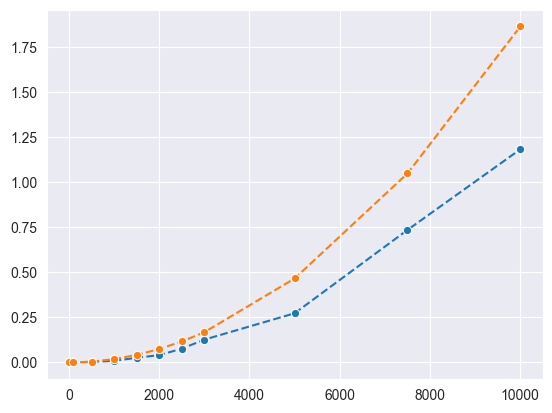

In [90]:
# Java QuickSort (NotInPlace) in Millisekunden [0.001, 0.001, 0.003, 0.004, 0.003, 0.004, 0.005, 0.006,
    # 0.006, 0.012, 0.013]
# Hier kommet der Plot! (69 nice)
# Ja stimmt, aber dafür müssen wir erstmal C berechnen
def computeC(time_list, size_list,func):
     length = len(time_list)
     iterator = range(length)
     plus = 0
     for i in iterator:
      plus +=  time_list[i]/func(size_list[i]) #wir berechnen C in dem wir die tatsächliche Zeit durch die Worstcase Operationen teilen und dann den Durchschnitt berechnen
     plus = plus/length
     return plus

cselec = computeC(s_times,arrar_sizes, lambda x : x**2)
print("Die Konstante für Selectionsort")
print(cselec)
cwerte =  map(lambda x : cselec* x**2, arrar_sizes)
cquick = computeC(q_times,arrar_sizes, lambda x : x* math.log2(x))
qwerte = map(lambda x: cquick* x * math.log2(x), arrar_sizes)
print("Die Konstante für Quicksort")
print(cquick)
sns.lineplot(x = arrar_sizes, y= s_times, linestyle = "dashed", marker = "o") #diese Linie ist blau
sns.lineplot(x = arrar_sizes, y= cwerte, linestyle = "dashed", marker = "o" )#diese Linie ist gelb








ValueError: All arrays must be of the same length

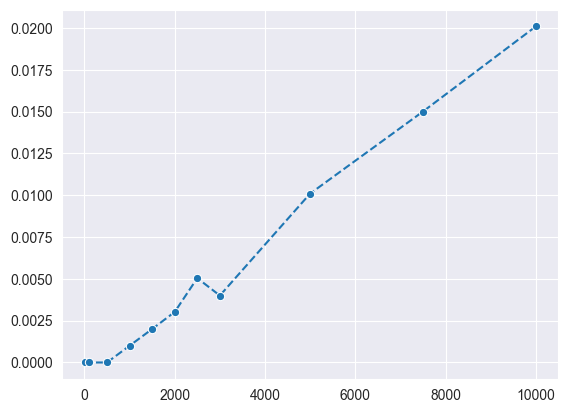

In [94]:
sns.lineplot(x= arrar_sizes,y =q_times,linestyle= "dashed", marker = "o") #diese Linie ist blau
sns.lineplot(x= arrar_sizes, y= qwerte , linestyle = "dashed", marker = "o")# diese Linie ist orange

#### 7. Erstellen Sie fÃ¼r die beiden Sortieralgorithmen jeweils einen Plot, in dem gemessene Laufzeit durch die entsprechende asymptotische Laufzeitentwicklung approximiert wird.

In [92]:
# Hier kommen die Plots!

#### 8. Vergleichen Sie die Laufzeit ihrer effizienten Implementierungen mit der Laufzeit der nativen sort() Funktion fÃ¼r Listen in Python

In [93]:
# Hier kommt eure Laufzeitanalyse!